## **Second Hand Car Price Prediction**

### Use below command to download dataset from Kaggle
    > !kaggle datasets download -d mayankpatel14/second-hand-used-cars-data-set-linear-regression

### Importing Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2024-02-13 10:20:48.787274: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 10:20:48.787344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 10:20:48.789659: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-13 10:20:48.797516: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Loading data from train.csv

In [2]:
raw_data = pd.read_csv("Second-Hand-Car-Data-Set/train.csv", sep = ",")
raw_data.shape

(1000, 12)

In [3]:
raw_data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


### Plotting Pair Plot

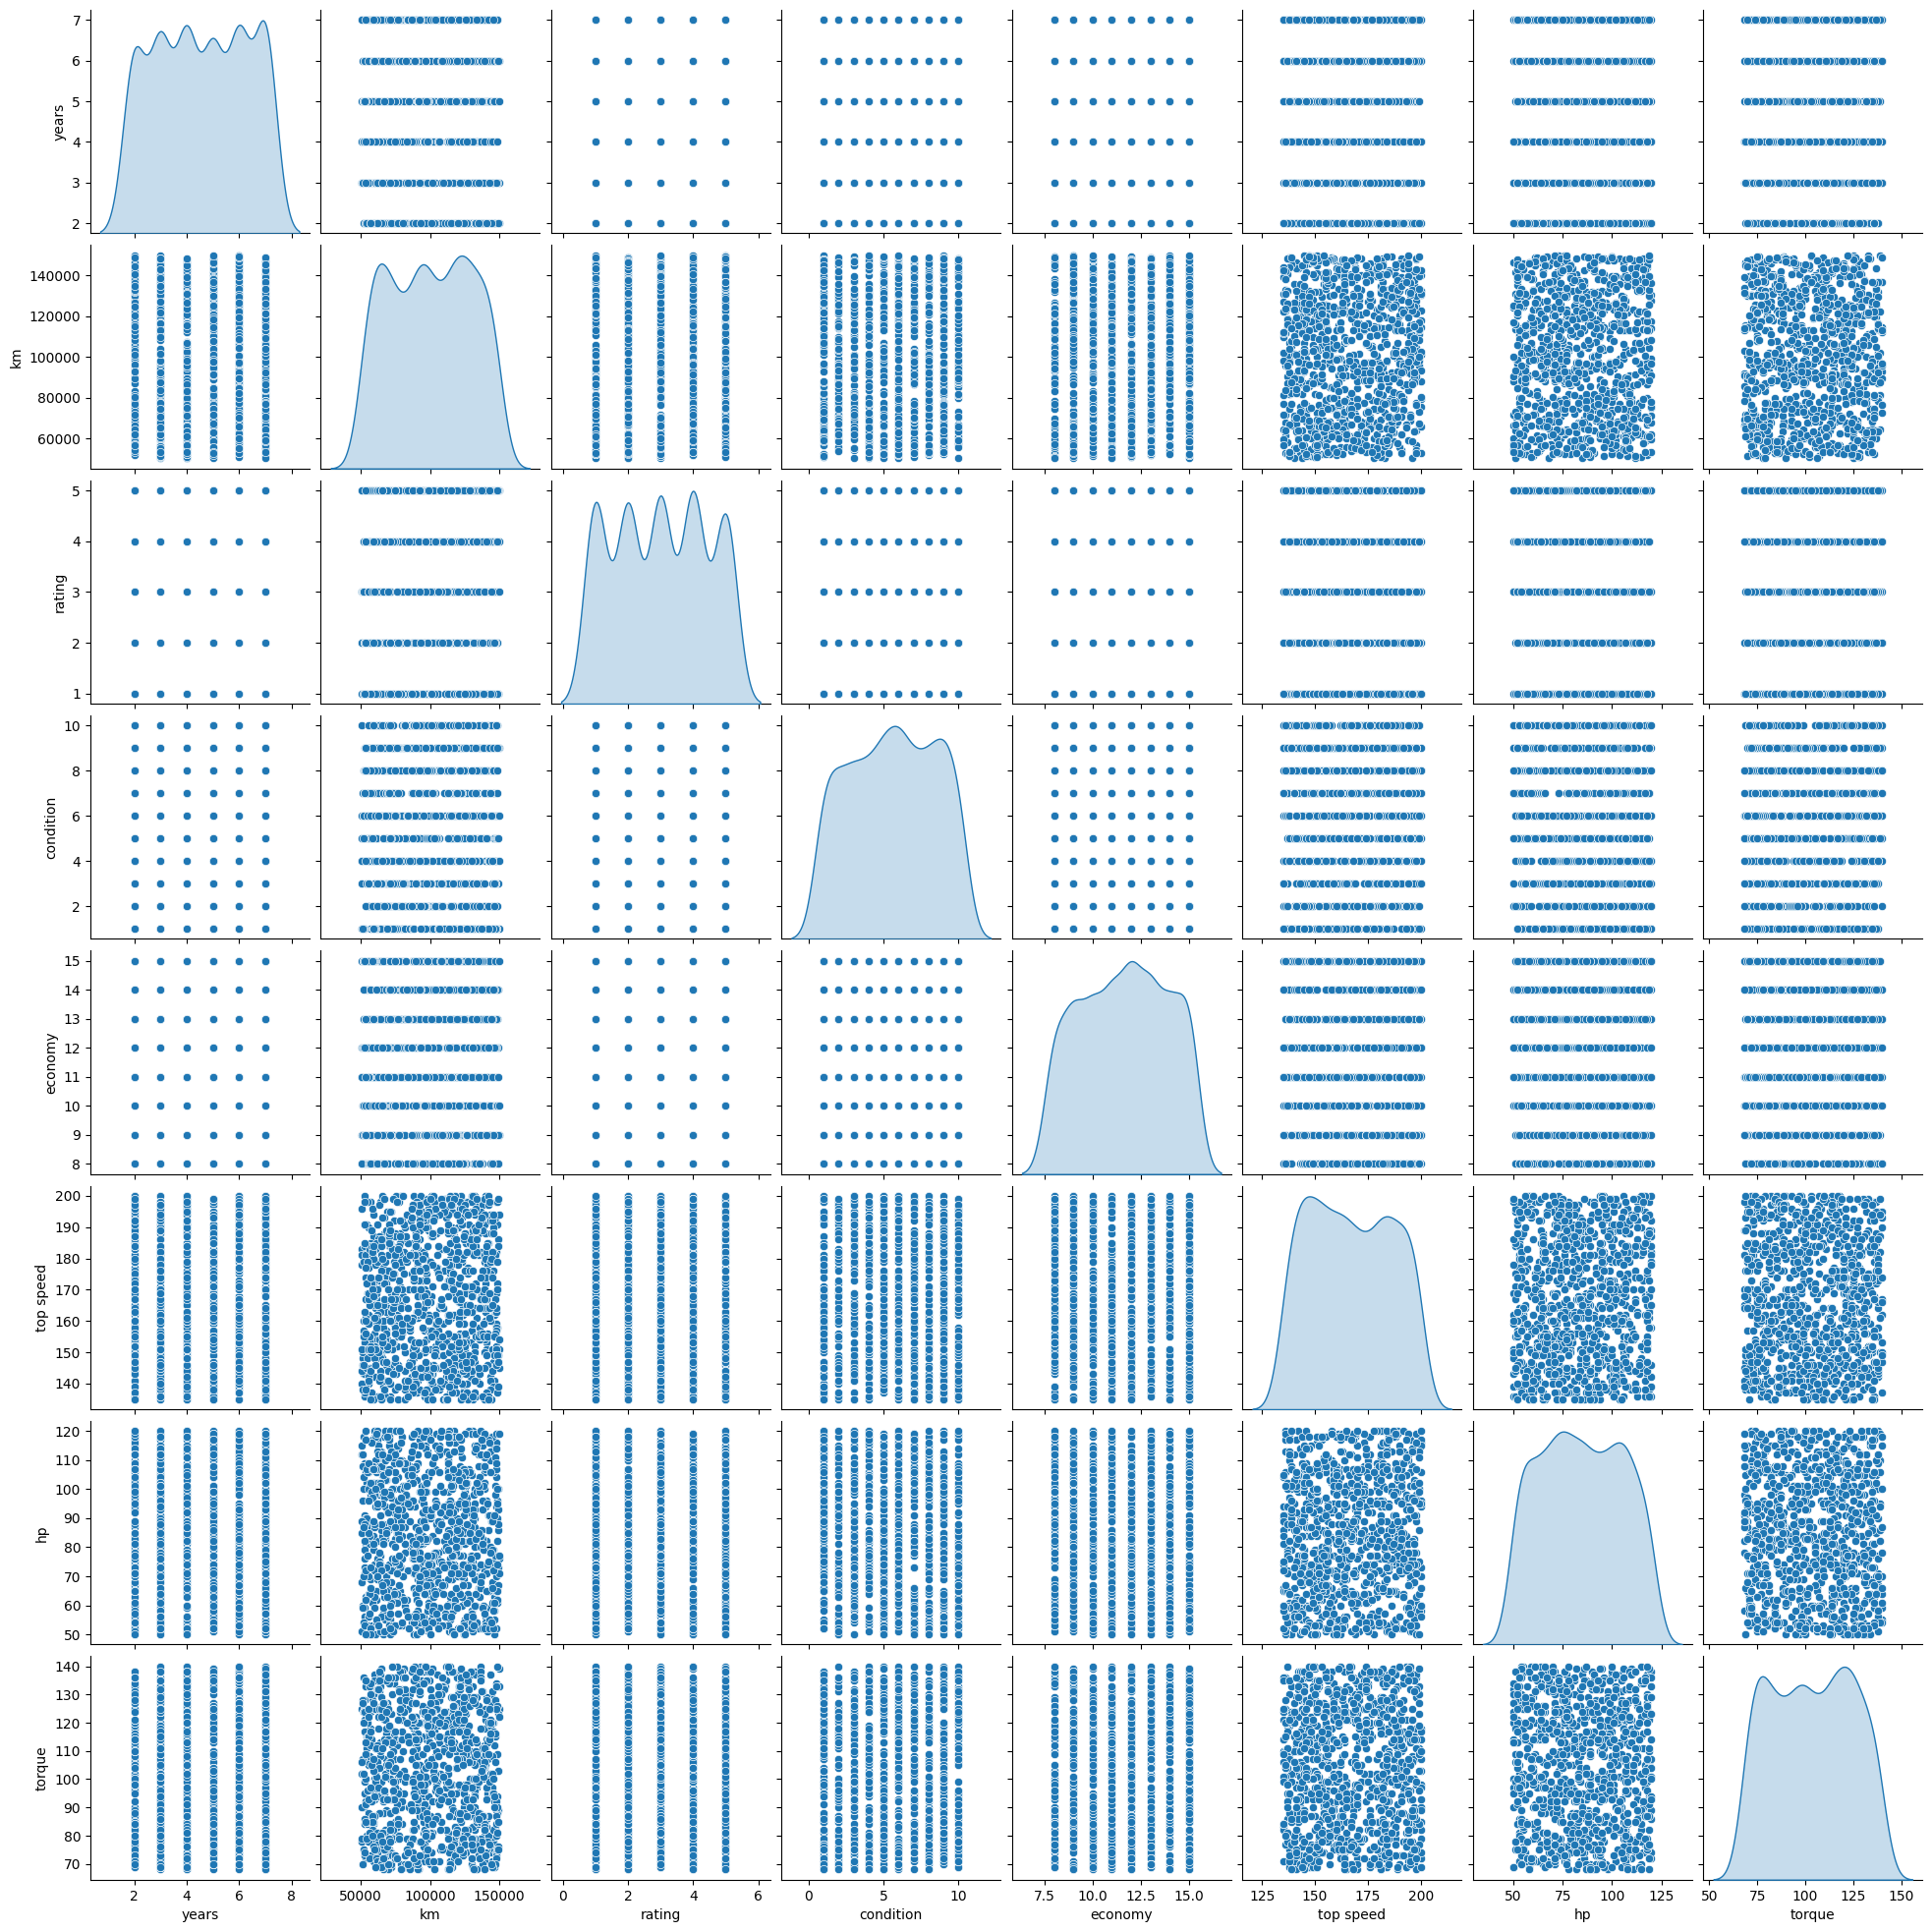

In [4]:
sns.pairplot(raw_data[['years','km','rating','condition','economy','top speed','hp','torque']], diag_kind = 'kde')

#### Converting Pandas Dataframe to Tensorflow

* Casting the numerical data to floating point numbers

In [5]:
tf_data = tf.constant(raw_data)
tf_data = tf.cast(tf_data, tf.float32)
tf_data

2024-02-13 10:21:01.650042: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-13 10:21:01.666448: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-13 10:21:01.666547: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-13 10:21:01.672806: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-13 10:21:01.672902: I external/local_xla/xla/stream_executor

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

#### Shuffling the rows

In [6]:
tf_data = tf.random.shuffle(tf_data)
tf_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[9.480000e+02, 6.112990e+05, 8.290390e+05, ..., 8.800000e+01,
        9.400000e+01, 4.759845e+05],
       [4.850000e+02, 5.323170e+05, 7.452230e+05, ..., 9.500000e+01,
        7.900000e+01, 1.267915e+05],
       [5.230000e+02, 5.796690e+05, 7.600380e+05, ..., 7.300000e+01,
        7.300000e+01, 2.219725e+05],
       ...,
       [9.690000e+02, 5.667830e+05, 7.388100e+05, ..., 1.060000e+02,
        1.360000e+02, 4.189340e+05],
       [3.160000e+02, 5.685800e+05, 8.200670e+05, ..., 6.600000e+01,
        1.240000e+02, 4.596865e+05],
       [3.500000e+01, 6.304890e+05, 7.171820e+05, ..., 1.010000e+02,
        9.400000e+01, 3.171190e+05]], dtype=float32)>

In [7]:
tf_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[9.480000e+02, 6.112990e+05, 8.290390e+05, 6.000000e+00,
        6.016000e+04, 3.000000e+00, 1.000000e+00, 1.000000e+01,
        1.610000e+02, 8.800000e+01, 9.400000e+01, 4.759845e+05],
       [4.850000e+02, 5.323170e+05, 7.452230e+05, 3.000000e+00,
        1.321290e+05, 2.000000e+00, 8.000000e+00, 1.200000e+01,
        2.000000e+02, 9.500000e+01, 7.900000e+01, 1.267915e+05],
       [5.230000e+02, 5.796690e+05, 7.600380e+05, 6.000000e+00,
        1.235800e+05, 3.000000e+00, 1.000000e+01, 1.100000e+01,
        1.440000e+02, 7.300000e+01, 7.300000e+01, 2.219725e+05],
       [2.930000e+02, 5.315970e+05, 7.312620e+05, 5.000000e+00,
        1.435260e+05, 3.000000e+00, 7.000000e+00, 8.000000e+00,
        1.750000e+02, 1.100000e+02, 1.370000e+02, 6.453100e+04],
       [2.850000e+02, 6.010970e+05, 8.482960e+05, 7.000000e+00,
        5.945400e+04, 3.000000e+00, 9.000000e+00, 1.100000e+01,
        1.350000e+02, 8.400000e+01, 7.100000e+01, 5

#### Populating X & y

* will be considering 'years','km','rating','condition','economy','top speed','hp' and 'torque' columns for X
* y will be current_price 

In [8]:
X = tf_data[:, 3: -1] # All rows, from column 3 to last but one

In [9]:
y = tf_data[:, -1]

In [10]:
X.shape, y.shape

(TensorShape([1000, 8]), TensorShape([1000]))

#### We need to convert y shape to (1000,1)

In [11]:
y = tf.expand_dims(y, axis = 1)

In [12]:
y.shape

TensorShape([1000, 1])

In [13]:
y[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[475984.5],
       [126791.5],
       [221972.5],
       [ 64531. ],
       [508328.5]], dtype=float32)>

### Normalization

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization

A preprocessing layer which normalizes continuous features

(x-mean)/(std)

```
tf.keras.layers.Normalization(
    axis=-1, mean=None, variance=None, invert=False, **kwargs
)

```

In [14]:
normalizer = tf.keras.layers.Normalization()
temp = tf.constant([[3,4,5,6,7]])
normalizer(temp)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=array([[3., 4., 5., 6., 7.]], dtype=float32)>

In [15]:
normalizer = tf.keras.layers.Normalization(mean = 5, variance = 4)
temp = tf.constant([[3,4,5,6,7]])
normalizer(temp)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=array([[-1. , -0.5,  0. ,  0.5,  1. ]], dtype=float32)>

In [16]:
normalizer = tf.keras.layers.Normalization(axis = -1, mean = 5, variance = 4) # By default it happens by column wise
temp = tf.constant([[3,4,5,6,7],
                [4,5,6,7,8]])
normalizer(temp)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

In [17]:
normalizer = tf.keras.layers.Normalization(axis = 0, mean = 5, variance = 4) # We can change the axis to 0 for row wise
temp = tf.constant([[3,4,5,6,7],
                [4,5,6,7,8]])
normalizer(temp)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

##### Not in all cases mean and variance can be provided up front. So, we have a method called adapt() which will compute mean and variance

In [18]:
normalizer = tf.keras.layers.Normalization()
temp = tf.constant([[3,4,5,6,7],
                [4,10,6,7,8],
                [32,1,56,3,5]])
normalizer.adapt(temp) # New step to compute mean and variance
normalizer(temp)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.7439795 , -0.26726124, -0.72800297,  0.3922322 ,  0.2672614 ],
       [-0.6695816 ,  1.3363062 , -0.6860028 ,  0.9805806 ,  1.0690452 ],
       [ 1.4135611 , -1.069045  ,  1.4140056 , -1.3728131 , -1.3363061 ]],
      dtype=float32)>

In [19]:
# Normalizing X
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X)
normalizer(X[:5])

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.8374946 , -1.3768047 ,  0.00855888, -1.6266168 , -0.72888374,
        -0.30567235,  0.16843306, -0.4476869 ],
       [-0.9084987 ,  1.093311  , -0.70466226,  0.8529825 ,  0.168205  ,
         1.7172824 ,  0.5097853 , -1.1603374 ],
       [ 0.8374946 ,  0.79989266,  0.00855888,  1.5614395 , -0.2803394 ,
        -1.1874732 , -0.56303596, -1.4453977 ],
       [ 0.25549683,  1.484478  ,  0.00855888,  0.49875405, -1.6259725 ,
         0.42051655,  1.2412543 ,  1.5952448 ],
       [ 1.4194924 , -1.401036  ,  0.00855888,  1.207211  , -0.2803394 ,
        -1.6543089 , -0.02662536, -1.5404178 ]], dtype=float32)>

#### **Linear Regression**

#### **Sequential**

https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

Sequential groups a linear stack of layers into a tf.keras.Model.

```
tf.keras.Sequential(
    layers=None, name=None
)

```

In [20]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


#### Another Way

In [21]:
model = tf.keras.Sequential()
model.add(normalizer)
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


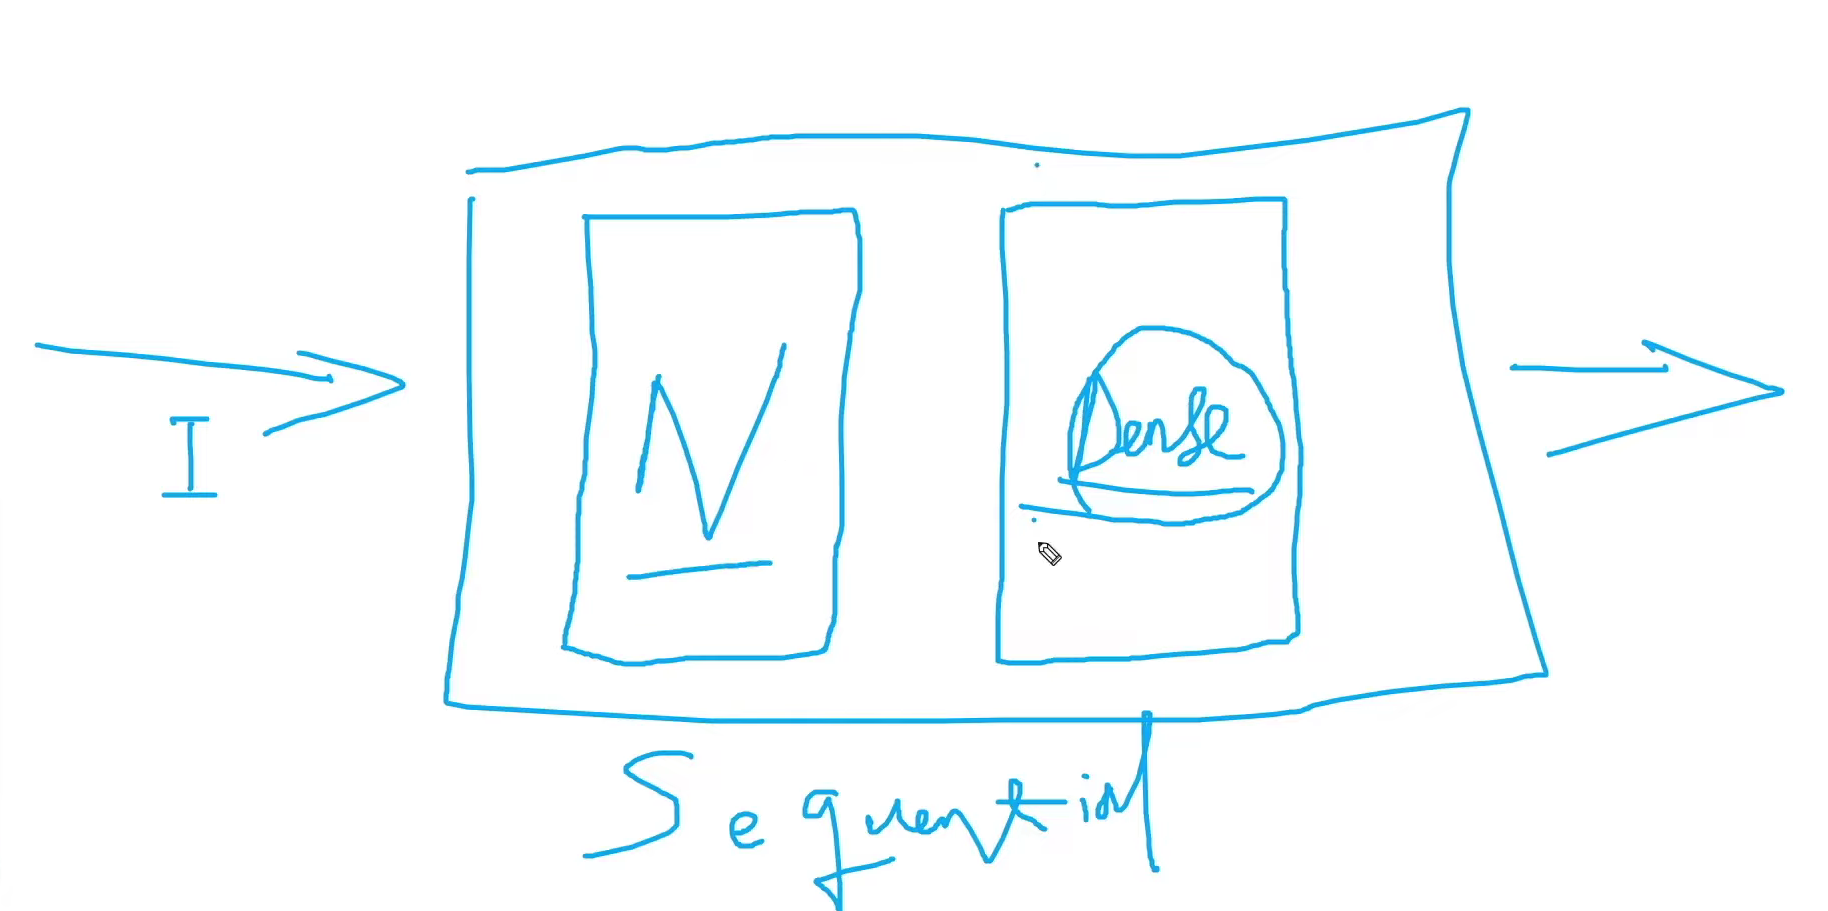

#### To plot a model

In [23]:
#dot_img_file = '/tmp/model_1.png'
#tf.keras.utils.plot_model(model, to_file = dot_img_file, show_shapes = True)